# Chapter 4: Machine Learning state of the art
## Figure 4.3
Overfit/oversmooth for regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

### Regression
Data of the first gravitational wave detected by LIGO [source https://losc.ligo.org/events/GW150914/].

Time is referred to September 14, 2015 at 09:50:45 UTC
data is sampled at $f_s = 16384 Hz$

In [20]:
def plot_chirp(data, fit, fit_label='optimal fit'):
    plt.figure(dpi=300)
    plt.title('LIGO, Hanford - GW150914')
    plt.xlabel('Time (s)')
    plt.ylabel('Strain ($10^{-21}$)')
    plt.scatter(data.values[:,0], data.values[:,1], label='data', linewidth=1,
                alpha=1, s=30, facecolors='none', edgecolors='C0')
    plt.plot(fit.values[:,0], fit.values[:,1], label=fit_label, color='C1')
    plt.legend(loc='upper left')
    plt.ylim([-1.5, 1.5])
    return plt

In [21]:
# Load data at 16384 Hz
data = pd.read_csv('../data/fig1-observed-H.txt', header=0, sep=' ')
fit = pd.read_csv('../data/fig1-waveform-H.txt', header=0, sep=' ')

In [22]:
# Downsample
T = 30
xx = data.values[::T,0]
yy = data.values[::T,1]
dwn_data = pd.DataFrame(data=np.vstack((xx, yy))).transpose()

print('new sampling frequency: {:2.3f} Hz'.format(16384 / T))

new sampling frequency: 546.000 Hz


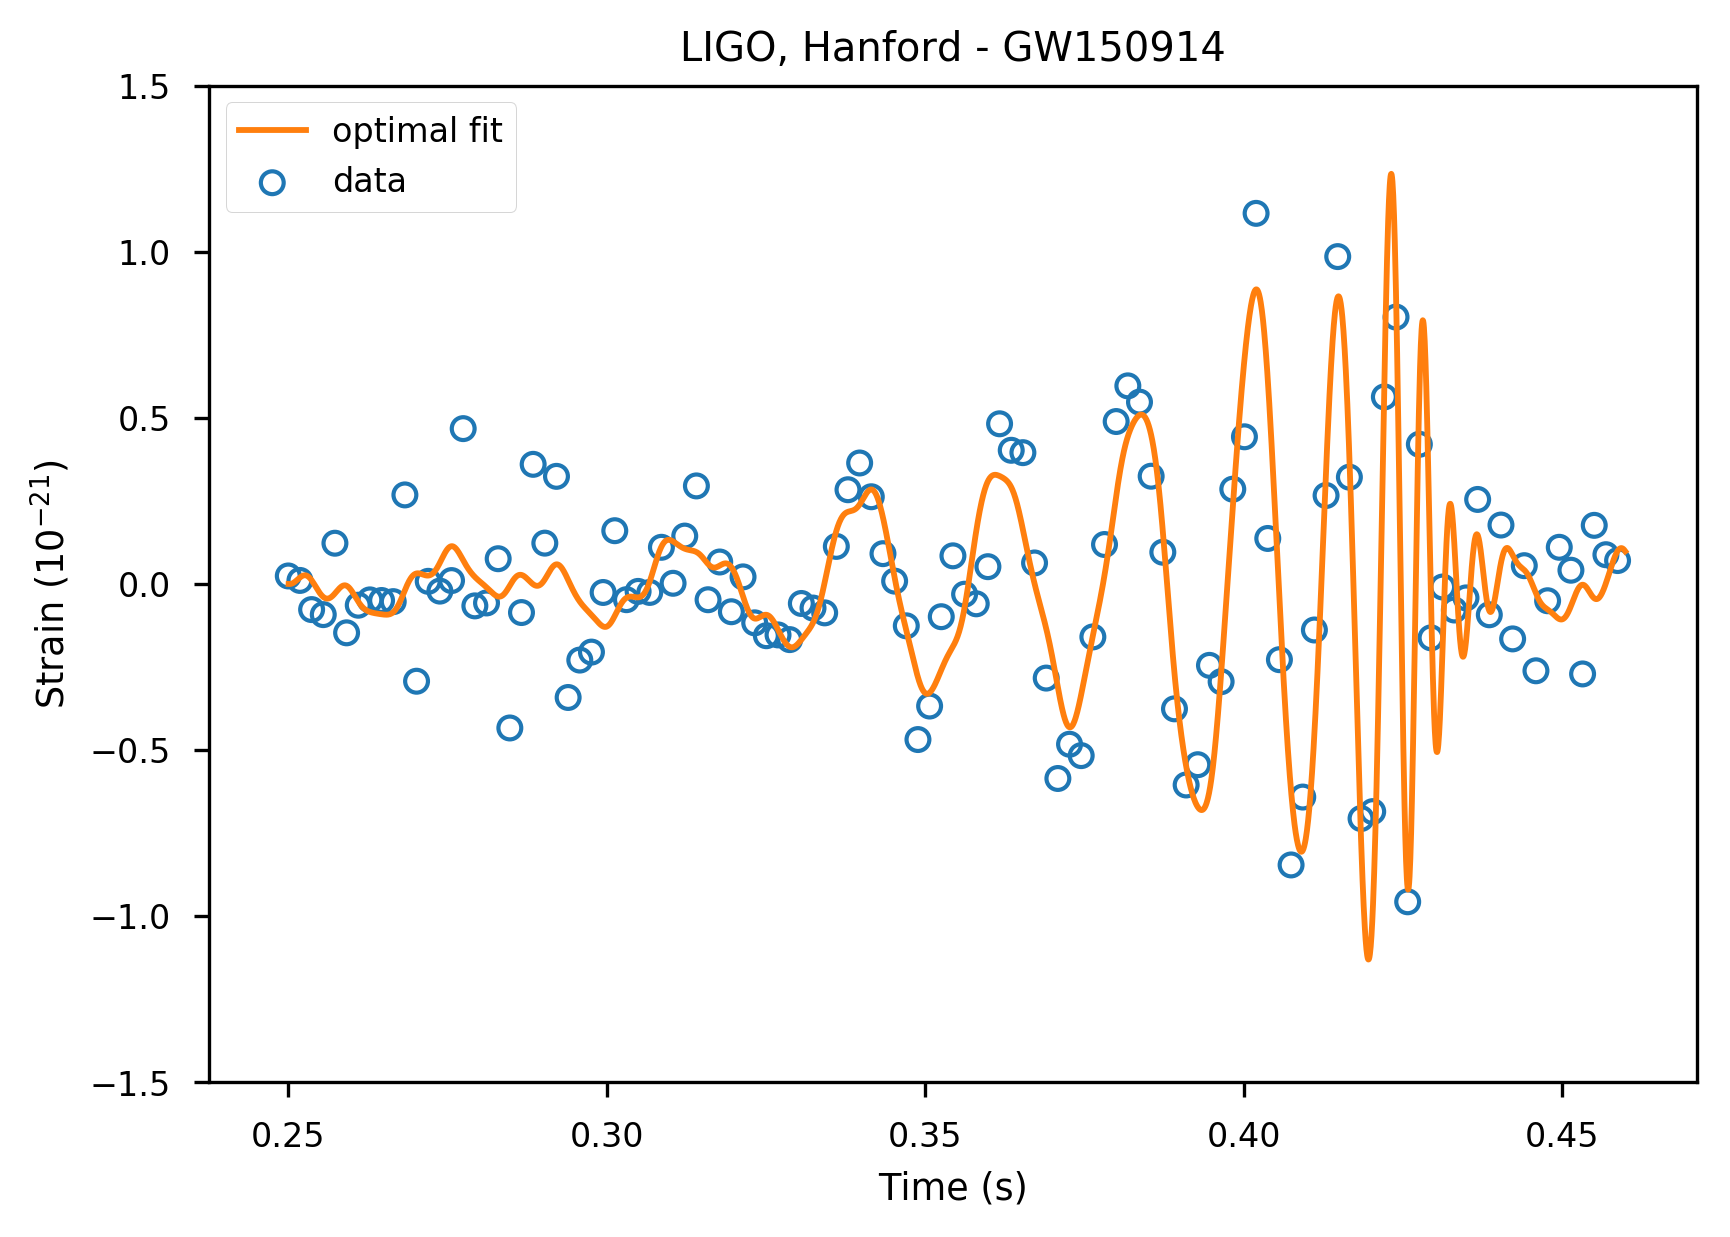

In [23]:
plot_chirp(dwn_data, fit, 'optimal fit')
plt.savefig('../images/regression_fit.png');

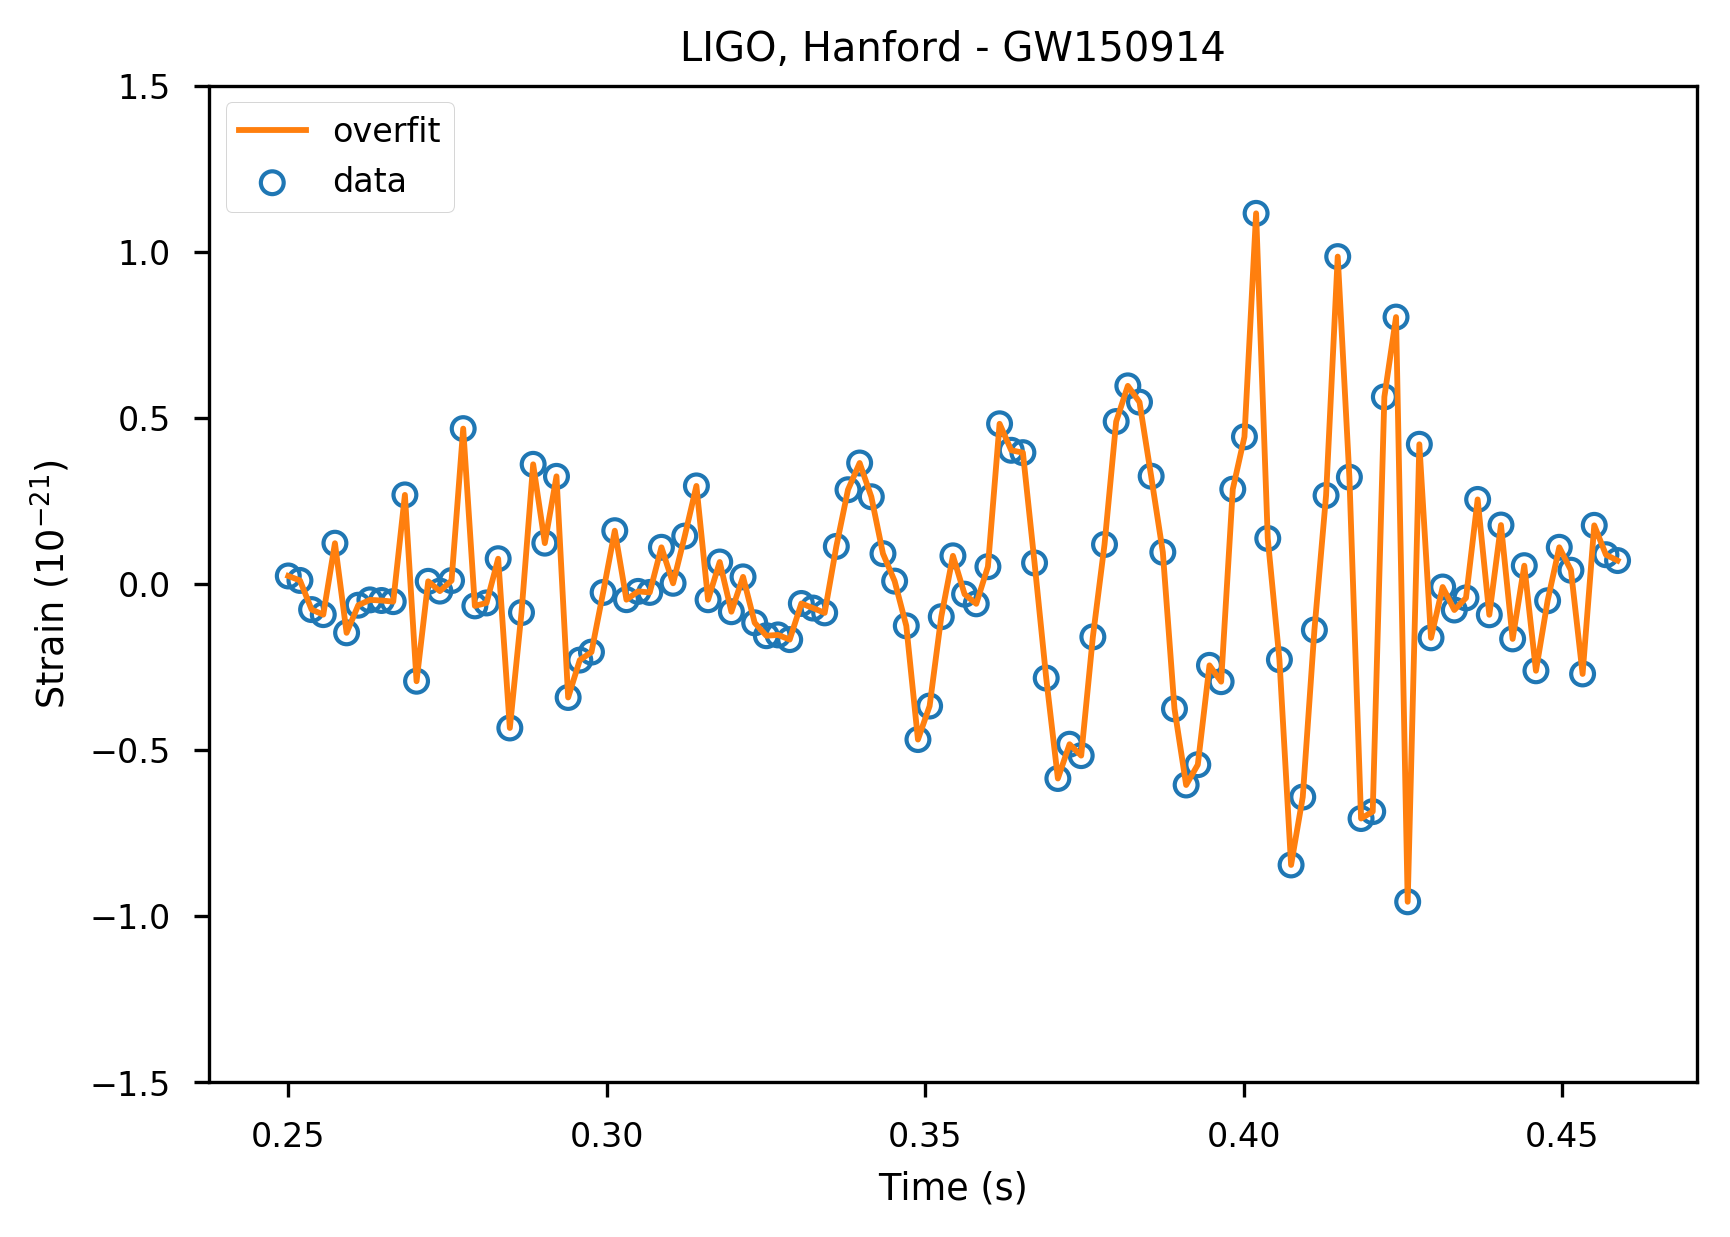

In [24]:
# overfit
from scipy.interpolate import interp1d

f = interp1d(xx, yy, kind='quadratic')
overfit = pd.DataFrame(data=np.vstack((xx, f(xx)))).transpose()

plot_chirp(dwn_data, overfit, 'overfit')
plt.savefig('../images/regression_overfit.png');

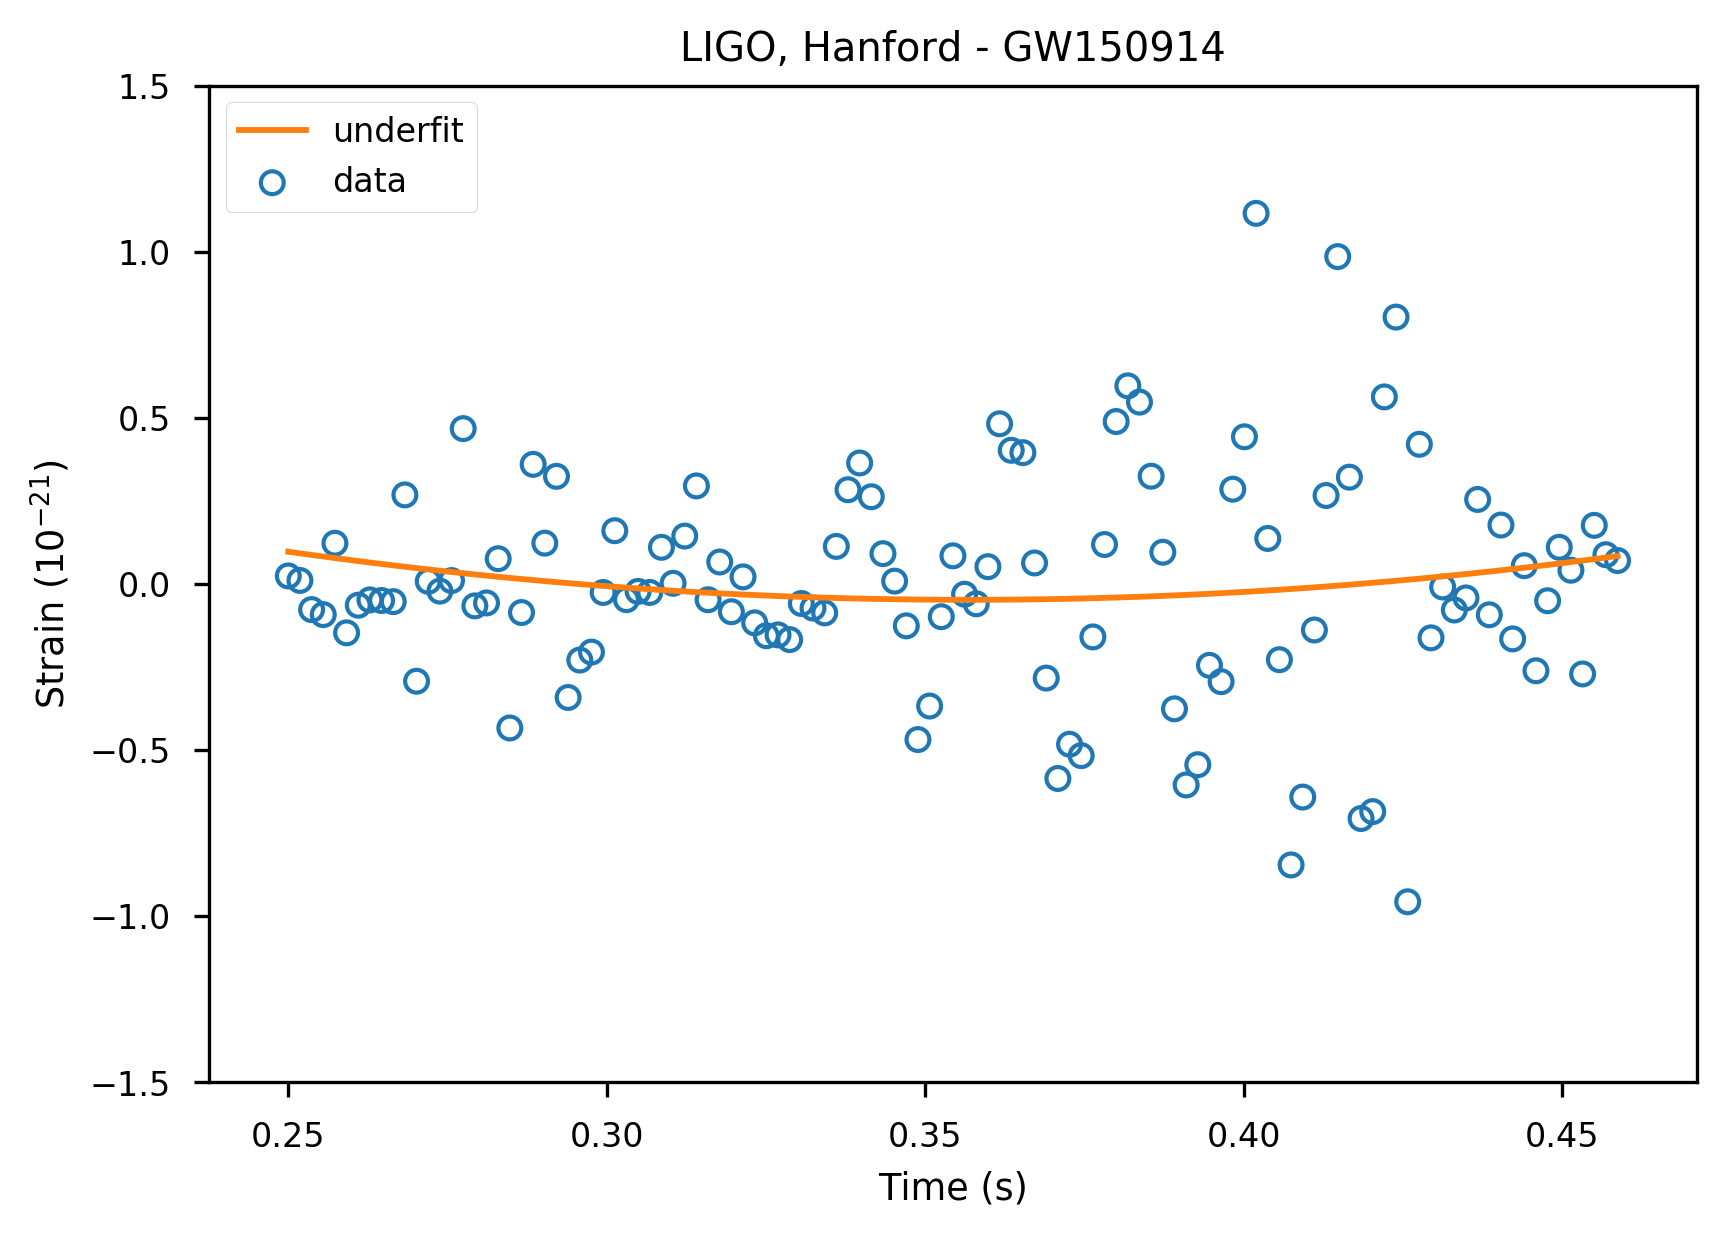

In [25]:
# underfit
from scipy.optimize import curve_fit
from scipy.signal import chirp

def func(x, f0, t1, f1):
    return chirp(x, f0, t1, f1, method='linear')

popt, pcov = curve_fit(func, xx, yy)
underfit = pd.DataFrame(data=np.vstack((xx, func(xx, *popt)))).transpose()

plot_chirp(dwn_data, underfit, 'underfit')
plt.savefig('../images/regression_underfit.png');